## PyTorch MNIST digital classifer
### (Routines explicitly written out rather than using pre-compiled)

In [1]:
# import fastai/fastbook etc, but pytorch used directly for classifier.
from fastai.vision.all import *
from fastbook import *
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
matplotlib.rc('image', cmap='Greys')

In [2]:
# Grab all of MNIST data
path = untar_data(URLs.MNIST)

Path.BASE_PATH = path
print("MNIST data: ", path.ls())
print((path/'training').ls())

MNIST data:  (#2) [Path('training'),Path('testing')]
(#10) [Path('training/0'),Path('training/2'),Path('training/9'),Path('training/8'),Path('training/7'),Path('training/1'),Path('training/5'),Path('training/4'),Path('training/6'),Path('training/3')]


In [6]:
# Optional: picture 

# Picture version
zeros = (path/'training'/'0').ls()
im0_path = zeros[0]
im0 = Image.open(im0_path)
im0

In [7]:
# Optional: picture one
# Array version
array(im0)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  85, 211, 255, 254, 105,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 253, 253, 253, 253, 172,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149, 253, 253, 253, 253, 253, 217,  29,   0

In [138]:
# list containing all images (as tensors) stacked together
# note, tensor(image) = array(image) : Numpy <--> PyTorch 
# Yes, this could be compressed and looped, but whatever.

# Sort array so in the same order
zeros = (path/'training'/'0').ls().sorted()
zero_tensors = [tensor(Image.open(o)) for o in zeros]
# convert list of arrays into single 3D tensor, and cast as floats between 0 and 1
stacked_zeros = torch.stack(zero_tensors).float()/255.0
# and valid / testing set (roll all the above into one)
stacked_valid_zeros = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'0').ls().sorted()]).float()/255.

ones = (path/'training'/'1').ls().sorted()
one_tensors = [tensor(Image.open(o)) for o in ones]
stacked_ones = torch.stack(one_tensors).float()/255.0
stacked_valid_ones = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'1').ls().sorted()]).float()/255.

twos = (path/'training'/'2').ls().sorted()
two_tensors = [tensor(Image.open(o)) for o in twos]
stacked_twos = torch.stack(two_tensors).float()/255.0
stacked_valid_twos = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'2').ls().sorted()]).float()/255.

threes = (path/'training'/'3').ls().sorted()
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_threes = torch.stack(three_tensors).float()/255.0
stacked_valid_threes = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls().sorted()]).float()/255.

fours = (path/'training'/'4').ls().sorted()
four_tensors = [tensor(Image.open(o)) for o in fours]
stacked_fours = torch.stack(four_tensors).float()/255.0
stacked_valid_fours = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'4').ls().sorted()]).float()/255.

fives = (path/'training'/'5').ls().sorted()
five_tensors = [tensor(Image.open(o)) for o in fives]
stacked_fives = torch.stack(five_tensors).float()/255.0
stacked_valid_fives = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'5').ls().sorted()]).float()/255.

sixes = (path/'training'/'6').ls().sorted()
six_tensors = [tensor(Image.open(o)) for o in sixes]
stacked_sixes = torch.stack(six_tensors).float()/255.0
stacked_valid_sixes = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'6').ls().sorted()]).float()/255.

sevens = (path/'training'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
stacked_sevens = torch.stack(seven_tensors).float()/255.0
stacked_valid_sevens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls().sorted()]).float()/255.

eights = (path/'training'/'8').ls().sorted()
eight_tensors = [tensor(Image.open(o)) for o in eights]
stacked_eights = torch.stack(eight_tensors).float()/255.0
stacked_valid_eights = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'8').ls().sorted()]).float()/255.

nines = (path/'training'/'9').ls().sorted()
nine_tensors = [tensor(Image.open(o)) for o in nines]
stacked_nines = torch.stack(nine_tensors).float()/255.0
stacked_valid_nines = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'9').ls().sorted()]).float()/255.0

In [134]:
# check shapes
zero_tensors[0].shape, len(zero_tensors), stacked_zeros.shape

(torch.Size([28, 28]), 5923, torch.Size([5923, 28, 28]))

<AxesSubplot:>

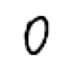

In [10]:
# check one of these images looks OK. 
# TIP: Since these are now arrays, use show_image from fastAI, otherwise the array will print
show_image(zero_tensors[1])

In [139]:
# Creating training set

# Merge 'em all together. Make 2x2 image matrices into 1D. "-1" = "make as large as needed"
train_x = torch.cat([stacked_zeros, stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines]).view(-1, 28*28)
valid_x = torch.cat([stacked_valid_zeros, stacked_valid_ones, stacked_valid_twos, stacked_valid_threes, stacked_valid_fours, stacked_valid_fives, stacked_valid_sixes, stacked_valid_sevens, stacked_valid_eights, stacked_valid_nines]).view(-1, 28*28)

# And label 'em
# unsqueeze inserts a dimension of size 1 in specified position
train_y = tensor([0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)).unsqueeze(1)
valid_y = tensor([0]*len(stacked_valid_zeros) + [1]*len(stacked_valid_ones) + [2]*len(stacked_valid_twos) + [3]*len(stacked_valid_threes) + [4]*len(stacked_valid_fours) + [5]*len(stacked_valid_fives) + [6]*len(stacked_valid_sixes) + [7]*len(stacked_valid_sevens) + [8]*len(stacked_valid_eights) + [9]*len(stacked_valid_nines)).unsqueeze(1)

# Check sizes
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape

(torch.Size([60000, 784]),
 torch.Size([60000, 1]),
 torch.Size([10000, 784]),
 torch.Size([10000, 1]))

In [140]:
# zip these, so that a tuple (x,y) returning when indexed. Needed for datasets in pytorch
dset = list(zip(train_x, train_y))
valid_dset = list(zip(valid_x, valid_y))

# Dataloader can take a dataset and give back batches
# Calc. average loss for a mini-batch (batch size) to save time
dl = DataLoader(dset, batch_size=256, shuffle=True)
valid_dl = DataLoader(valid_dset, batch_size=256)

# check shapes:
x,y = dset[0]
print("dataset check: ", x.shape, y)

# check a one entry batch
xb, yb = first(dl)
print("dataloader check: ", xb.shape, yb.shape)




dataset check:  torch.Size([784]) tensor([0])
dataloader check:  torch.Size([256, 784]) torch.Size([256, 1])


In [13]:
# randomly initialise weights
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

# 1 layer with 10 outputs: one for each catagory
weights = init_params((28*28, 10)) 
bias = init_params(10) # 10 outputs

# check shapes
weights.shape, bias.shape, bias

(torch.Size([784, 10]),
 torch.Size([10]),
 tensor([-0.4355, -0.4923, -0.4835, -0.4625,  0.0382, -0.2309, -0.2454, -0.4351, -0.4533, -0.1592], requires_grad=True))

(array([  1.,   1.,  12.,  14.,  29.,  39.,  75.,  96.,  94., 105.,  97.,  68.,  58.,  41.,  21.,  19.,   7.,   4.,   1.,   2.]),
 array([-2.9151323 , -2.602356  , -2.2895799 , -1.9768037 , -1.6640275 , -1.3512512 , -1.038475  , -0.7256988 , -0.41292262, -0.10014641,  0.2126298 ,  0.525406  ,  0.8381822 ,  1.1509584 ,
         1.4637346 ,  1.7765108 ,  2.089287  ,  2.4020634 ,  2.7148395 ,  3.0276155 ,  3.3403919 ], dtype=float32),
 <BarContainer object of 20 artists>)

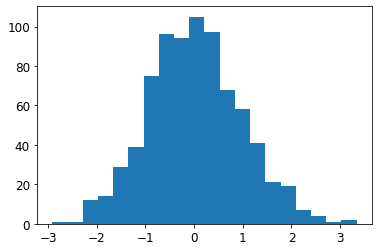

In [14]:
# Optional: plot one set of weights to check distribution 
plt.hist(weights[:,5].detach().numpy(), bins=20)

In [15]:
# weights affect pixel values linearly: x*w + b
# "@" = python matrix application: (train_x[0]*weights.T).sum() + bias
# gives "prediction"  for image (the most simplest natwork eva.)
def linear_layer(xb): return xb@weights + bias

preds = linear_layer(train_x)

# Annnnnd check shape and values for image 100
preds.shape, preds[100,:]

(torch.Size([60000, 10]),
 tensor([-2.6993, -2.1606, -5.3495,  9.5574, -8.0868, -4.7685,  0.3142,  9.1055,  6.7518, -3.9975], grad_fn=<SliceBackward>))

In [157]:
# OK, things are getting real. Time for a loss function. 
# This must be differentiable and high when result is bad.

def mnist_loss_function(predictions, targets):
    # For multiple (more than two) catagories use soft max + cross-entropy
    # (Note, pytorch pre-built cross-entropy includes all these lines together)
    
    # softmax gives probabilities (between 0 and 1) based on raw values for each catagory, = e^y(i)/sum(e^y(i))
    predictions_sm = torch.exp(predictions) / torch.sum(torch.exp(predictions), axis=1).view(-1,1)
    
    # cross-entropy loss: measures performance of classification model whose output is a probability between 0 and 1 (i.e. post softmax)
    # -(1/N) * sum(target(i) * log(softmaxpredictions(i))
    # As required, the better the predicition, the lower the loss
    
    # make targets one hot encoded, i.e. 3 --> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    # categories need to be specified, as batch may not contain examples of each one
    categories=[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    enc = OneHotEncoder(categories=categories)
    targets_onehot = enc.fit_transform(targets).toarray()

    loss = -torch.sum(torch.from_numpy(targets_onehot) * torch.log(predictions_sm), axis=1)/10.0
  
    return loss.mean()

### Optimisation time: update weights based on gradients. 

In [17]:
# Calculate gradients of weights and biases here.
def calc_grad(xb, yb, model):
    # this model is just the one linear_layer!
    preds = model(xb)
    loss = mnist_loss_function(preds, yb)
    
    # calculate gradients of weights and bias that had "requires_grad_()" when initialised 
    # note, this ADDS to the gradients, so these must be cleared before calc_grad is called (in train_epoch)
    loss.backward() 
    

In [18]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:         # params = weights and bias
            p.data -= p.grad*lr  # update data based on gradient
            p.grad.zero_()       # clear gradients before next calculation
           

In [152]:
# validation accuracy: i.e. an easy to look at measure of how well we're doing
def batch_accuracy(xb, yb):
    # softmax the 10 raw outputs to turn into probabilities
    predictions_sm = torch.exp(xb) / torch.sum(torch.exp(xb), axis=1).view(-1,1)
    
    # maximum probability is the prediction. Sum the ones that equal the prediction
    accuracy = predictions_sm.argmax(dim=1).eq(yb[:,0]).sum().float()/yb.shape[0]
    return accuracy

In [84]:
# validation / test set results
def validation_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)



### Go go go!

In [118]:
lr = 1.

# re-initialize weights and bias here, just in case cells have got in a mess.
weights = init_params((28*28,10)) 
bias = init_params(10) # 10 outputs / categories
params = weights, bias

# run for however many epochs is cool
for i in range(20):
    train_epoch(linear_layer, lr, params)
    print(validation_epoch(linear_layer), end=' ')

0.6546 0.7428 0.7824 0.8049 0.8206 0.8317 0.839 0.8449 0.8497 0.8529 0.8571 0.8608 0.8611 0.8645 0.8662 0.8682 0.8696 0.0957 0.0957 0.0957 

### Annnnnd with FastAI

In [124]:
def train_epoch_fastAI(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt_fastAI.step()
        opt_fastAI.zero_grad()

linear_model_fastAI = nn.Linear(28*28, 10)
opt_fastAI = SGD(linear_model_fastAI.parameters(), lr)

for i in range(5):
    train_epoch_fastAI(linear_model_fastAI)
    print(validation_epoch(linear_model_fastAI), end=' ')

0.8836
0.8974
0.9023
0.9056
0.9082


### or with Learner...

In [159]:
# this one fails on some float/double error and I'm giving up!

dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28, 10), opt_func=SGD, loss_func=mnist_loss_function, metrics=batch_accuracy)

learn.fit(5, lr=lr)


RuntimeError: expected dtype double for `end` but got dtype float